In [1]:
import pandas as pd
from rdkit import Chem
import collections
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm
import warnings

In [2]:
df=pd.read_csv('../0 data preparation/All.csv')

### Property calculation

In [3]:
df2=df
smileList = df2.Standard_Smiles.values
HBA = []
HBD = []
AlogP = []
TPSA = []
num_rotatable_bonds = []
num_heavy_atoms = []
MW = []
FractionCSP3 = []
NumAromaticRings = []
RingCount = []
NumAliphaticRings = []
for i in smileList:
    mol = Chem.MolFromSmiles(i)
    HBA.append(rdescriptors.CalcNumLipinskiHBA(mol))
    HBD.append(rdescriptors.CalcNumLipinskiHBD(mol))
    AlogP.append(Descriptors.MolLogP(mol))
    TPSA.append(float(rdescriptors.CalcTPSA(mol)))
    num_rotatable_bonds.append(Descriptors.NumRotatableBonds(mol))
    num_heavy_atoms.append(mol.GetNumHeavyAtoms())
    MW.append(float(Descriptors.MolWt(mol)))
    FractionCSP3.append(rdescriptors.CalcFractionCSP3(mol))
    NumAromaticRings.append(Descriptors.NumAromaticRings(mol))
    RingCount.append(Descriptors.RingCount(mol))
    NumAliphaticRings.append(Descriptors.RingCount(mol)-Descriptors.NumAromaticRings(mol))
df2["HBA"] = HBA
df2["HBD"] = HBD
df2["AlogP"] = AlogP
df2["TPSA"] = TPSA
df2["NumRotatableBonds"] = num_rotatable_bonds
df2["NumHeavyAtoms"] = num_heavy_atoms
df2["MW"] = MW
df2["NumAromaticRings"] = NumAromaticRings
df2["RingCount"] = RingCount
df2['NumAliphaticRings']=NumAliphaticRings
df2["FractionCSP3"] = FractionCSP3
df2.to_csv('All_Property.csv',index=False)
df2

,ID,Name,CAS Number,Standard_Smiles,Type,Total weight /kg,Piece weight /mg,Content(%),Part,Family,...,HBD,AlogP,TPSA,NumRotatableBonds,NumHeavyAtoms,MW,NumAromaticRings,RingCount,NumAliphaticRings,FractionCSP3
0,TPCN02029,Forskoditerpenosides A,'942942-63-4',C=CC1(C)CC(=O)C2(O)C(C)(O1)C(O)C(OC(C)=O)C1C(C...,Diterpenoids,110.00,15.0,0.000014,Whole plants,Lamiaceae,...,6,-0.6559,192.44,5,40,572.648,0,4,4,0.857143
1,TPCN02029,Forskoditerpenosides A,'942942-63-4',C=CC1(C)CC(=O)C2(O)C(C)(O1)C(O)C(OC(C)=O)C1C(C...,Diterpenoids,110.00,15.0,0.000014,Whole plants,Lamiaceae,...,6,-0.6559,192.44,5,40,572.648,0,4,4,0.857143
2,TPCN02063,Forskoditerpenosides B,'942942-66-7',C=CC1(C)CC(=O)C2(O)C(C)(O1)C(OC(C)=O)C(OC(C)=O...,Diterpenoids,110.00,8.0,0.000007,Whole plants,Lamiaceae,...,5,-0.0851,198.51,6,43,614.685,0,4,4,0.833333
3,TPCN02063,Forskoditerpenosides B,'942942-66-7',C=CC1(C)CC(=O)C2(O)C(C)(O1)C(OC(C)=O)C(OC(C)=O...,Diterpenoids,110.00,8.0,0.000007,Whole plants,Lamiaceae,...,5,-0.0851,198.51,6,43,614.685,0,4,4,0.833333
4,TPCN02186,NaN,'1309362-21-7',CC=C(C)C(=O)OC1C2C(OC(=O)CC(C)C)C(C)CC2(O)C(=O...,Diterpenoids,2.00,185.0,0.009250,Aerial parts,Lamiaceae,...,1,4.5761,181.69,10,53,739.859,1,5,4,0.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,TPCN06379,?javablumine A,'2365377-18-8',C=C1CCC23CCC4(C)C5(C)CCC6C(C)(CO)C(O)CCC6(C)C5...,Triterpenoids,4.15,9.1,0.000219,Aerial parts,Adoxaceae,...,2,4.6439,79.29,1,35,484.677,0,7,7,0.900000
7504,TPCN06380,Schisanchinlactone A,'2695486-76-9',CC1=CCC(C(C)C2CCC3(C)C4=C(CCC23C)C2OC23C=CC(=O...,Triterpenoids,9.80,3.2,0.000033,Aerial parts,Schisandraceae,...,0,5.8365,65.13,2,35,480.645,0,6,6,0.733333
7505,TPCN06381,Schisanchinlactone B,'2695486-77-0',CC(=O)OC1CC2(C)C(C(C)C3CC=C(C)C(=O)O3)CCC2(C)C...,Triterpenoids,9.80,1.2,0.000012,Aerial parts,Schisandraceae,...,0,6.1669,78.90,3,38,522.682,0,5,5,0.656250
7506,TPCN06382,Schisanchinlactone C,'2695486-78-1',CC1=CCC(C(C)C2CCC3(C)C4=C(C=C5C=CC(=O)OC(C)(C)...,Triterpenoids,9.80,2.2,0.000022,Aerial parts,Schisandraceae,...,0,5.8043,69.67,2,35,478.629,0,5,5,0.633333


### Properties of compounds in each content range

In [4]:
content1=df2[(df2['Content(%)']>=0.000001)&(df2['Content(%)']<0.00001)]
content1=content1.drop_duplicates(subset='ID')
content2=df2[(df2['Content(%)']>=0.00001)&(df2['Content(%)']<0.0001)]
content2=content2.drop_duplicates(subset='ID')
content3=df2[(df2['Content(%)']>=0.0001)&(df2['Content(%)']<0.001)]
content3=content3.drop_duplicates(subset='ID')
content4=df2[(df2['Content(%)']>=0.001)&(df2['Content(%)']<0.01)]
content4=content4.drop_duplicates(subset='ID')
content5=df2[(df2['Content(%)']>=0.01)&(df2['Content(%)']<0.1)]
content5=content5.drop_duplicates(subset='ID')
content6=df2[(df2['Content(%)']>=0.1)&(df2['Content(%)']<1)]
content6=content6.drop_duplicates(subset='ID')
content7=df2[(df2['Content(%)']>=1)&(df2['Content(%)']<10)]
content7=content7.drop_duplicates(subset='ID')

In [5]:
### Calculate the average of various properties
property_list=['HBA','HBD','AlogP','TPSA','MW','NumRotatableBonds','NumHeavyAtoms','NumAromaticRings','RingCount','NumAliphaticRings','FractionCSP3']
content_list=['Content1','Content2','Content3','Content4','Content5','Content6','Content7']
data=pd.DataFrame(property_list,columns=[''])
def Property_Calculate(content):
    property_value=[]
    for i in property_list:
        ave_property=round(sum(content[i].values)/len(content),2)
        property_value.append(ave_property)
    return property_value
data['$[10^{-6},10^{-5})$']=Property_Calculate(content1)
data['$[10^{-5},10^{-4})$']=Property_Calculate(content2)
data['$[10^{-4},10^{-3})$']=Property_Calculate(content3)
data['$[10^{-3},10^{-2})$']=Property_Calculate(content4)
data['$[10^{-2},10^{-1})$']=Property_Calculate(content5)
data['$[10^{-1},1)$']=Property_Calculate(content6)
data['$[1,10)$']=Property_Calculate(content7)
data.set_index('', inplace = True)
data

,"$[10^{-6},10^{-5})$","$[10^{-5},10^{-4})$","$[10^{-4},10^{-3})$","$[10^{-3},10^{-2})$","$[10^{-2},10^{-1})$","$[10^{-1},1)$","$[1,10)$"
,,,,,,,
HBA,9.67,10.31,11.20,13.32,13.58,16.12,18.75
HBD,4.17,4.81,5.46,6.77,7.19,8.85,10.00
AlogP,1.35,2.06,1.79,1.13,0.98,0.71,-0.08
TPSA,148.89,160.25,175.05,209.64,215.30,256.76,298.74
MW,525.16,594.92,631.58,710.38,723.68,838.52,924.56
NumRotatableBonds,4.83,5.95,6.40,7.45,7.41,8.59,9.75
NumHeavyAtoms,37.41,42.23,44.69,50.03,50.93,58.92,64.75
NumAromaticRings,0.84,0.48,0.40,0.29,0.26,0.27,0.00
RingCount,5.43,5.65,5.80,6.21,6.39,7.29,7.75


### Barplot

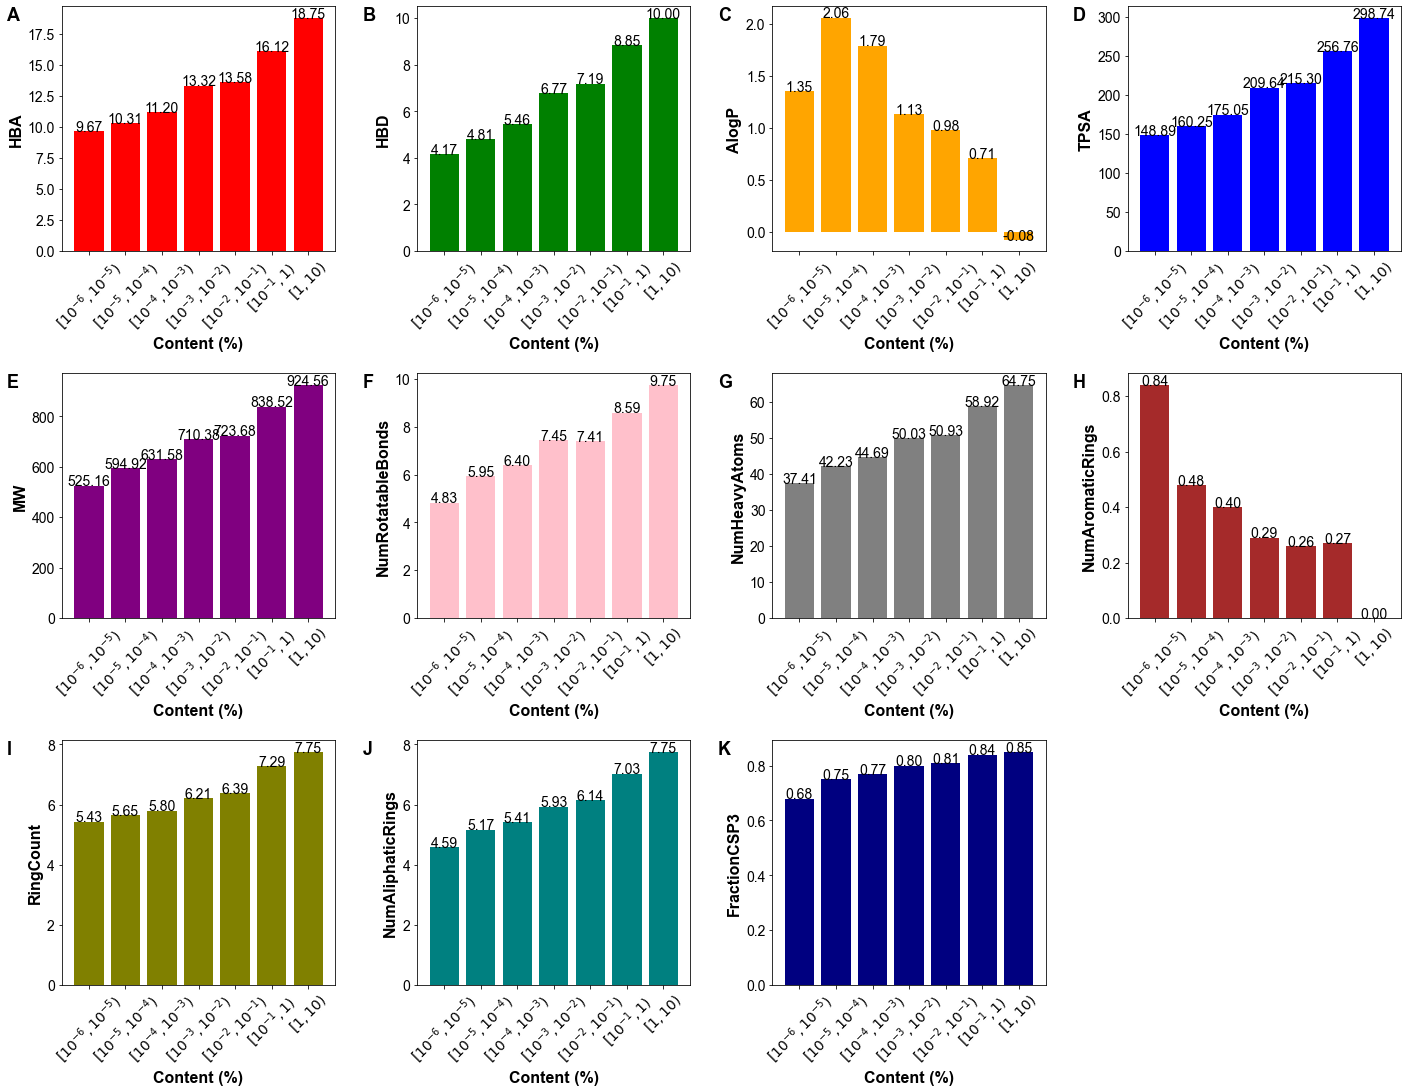

In [7]:
import warnings
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14
label_font = fm.FontProperties(weight='bold', size=16)
colors = ['red', 'green', 'orange', 'blue', 'purple', 'pink', 'gray', 'brown', 'olive', 'teal', 'navy', 'maroon']
fig = plt.figure(figsize=(24, 18))
gs = GridSpec(nrows=3, ncols=4, figure=fig, wspace=0.3, hspace=0.5, width_ratios=[1,1,1,1])
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
for i in range(11):
    ax = fig.add_subplot(gs[i // 4, i % 4])
    bars = ax.bar(data.columns, data.iloc[i, :], color=colors[i % 12])
    ax.set_xlabel('Content (%)', fontproperties=label_font)
    ax.set_ylabel(data.index[i], fontproperties=label_font)
    ax.tick_params(axis='x', labelrotation=45)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center')
    ax.text(-0.2, 1, labels[i], transform=ax.transAxes, ha='left', va='top', fontweight='bold', fontsize=18)
plt.savefig('Property.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()